# <font color=green>__GraviPy__ </font>

## https://pypi.org/project/GraviPy/

### Está paquetería de Python es útil en Relatividad General. 
### Para una métrica $g^{\mu \nu}$ en ciertas coordenadas $x^\mu = (x^1,x^2,x^3,x^4)$, lo que hace está paquetería de Python son cálculos para obtener los símbolos de Christofell $\Gamma^{\ \sigma}_{\mu \nu}$, el tensor de Riemann $R^{\sigma}_{\mu \nu \gamma}$, el tensor de Ricci $R^{\mu \nu}$, el escalar de Ricci $R$, la ecuación de geodésicas entre otras propiedades. 

### Obtener esto es necesario para resolver las ecuaciones de Einstein para una métrica $g^{\mu \nu}$.

### $G_{\mu \nu} = R_{\mu \nu} - \dfrac{1}{2}R g_{\mu \nu} = 8\pi G T_{\mu \nu} $ .

## <font color=red>__NOTA__: </font>

###  La convención de índices que utiliza GraviPy es: 
###  $\bullet$      $\chi(-i)$   para índices  contravariantes  $ \chi^\mu $ .
###  $\bullet$       $\chi(+i)$  para índices covariantes $ \chi_\mu $ .
#### Las unidades que se manejan son $c=1$. 

### Las formulas que usa está paquetería de Python son:

### $\circ \quad $  $\Gamma^{\sigma}_{\ \mu \nu} = \dfrac{1}{2} g^{\sigma \gamma }\left( g_{\gamma \mu, \nu } + g_{\gamma \nu, \mu } - g_{\mu \nu , \gamma } \right) $ 

### $\circ \quad $ $R^{\rho}_{\sigma \mu \nu } = \partial_\mu \Gamma^{ \rho}_{\ \nu \sigma} -  \partial_\nu \Gamma^{\rho}_{\ \mu \sigma} + \Gamma^{ \rho}_{\ \mu \lambda}  \Gamma^{ \lambda}_{\ \nu \sigma} - \Gamma^{ \rho}_{\ \nu \lambda} \Gamma^{\lambda}_{\ \mu \sigma}  $

### $\circ \quad $ $R_{\mu \nu} = R^{\sigma}_{\mu \sigma \nu} $

### $\circ \quad $ $R = R_{\mu \nu} g^{\mu \nu}$

### $\circ \quad $ $\dfrac{d^2 x^\mu}{ds^2} + \Gamma^{\mu}_{\ \alpha \beta} \dfrac{d x^\alpha}{ds} \dfrac{d x^\beta}{ds} = 0$



# <font color=purple>__Métrica de Schwarzschild__: </font>

### En este caso se muestra la solución para la métrica:

### $ds^2 = g_{\mu \nu}dx^\mu dx^\nu= -\left(1 - \dfrac{2GM}{r}  \right) dt^2 + \left(1 - \dfrac{2GM}{r}  \right)^{-1} dr^2 + r^2 d \theta^2 + r^2 sin^2 \theta  d \phi^2$ 

In [1]:
import numpy as np
from sympy import *    
from gravipy import *  

init_printing()

x,y,z = symbols('x, y, z')
#print x
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, M') #Define los símbolos
#print r


chi = Coordinates('\chi', [t, r, theta, phi])  #Crea el 4-Vector  

Metric = diag(-(1 - 2 * M / r), 1 / (1 - 2 * M / r), r ** 2, r ** 2 * sin(theta) ** 2) # Define la métrica

g = MetricTensor('g', chi, Metric)  #Los índices corren de 1,2,3,4.

#print chi(1)
for i in range(4):   
    print chi(-i-1)
#print g(-All, -All) #g^(\mu \nu)
g(All, All)  #g_(\mu \nu)
#g.components

t
r
\theta
\phi


⎡2⋅M                                    ⎤
⎢─── - 1      0      0          0       ⎥
⎢ r                                     ⎥
⎢                                       ⎥
⎢             1                         ⎥
⎢   0     ─────────  0          0       ⎥
⎢           2⋅M                         ⎥
⎢         - ─── + 1                     ⎥
⎢            r                          ⎥
⎢                                       ⎥
⎢                     2                 ⎥
⎢   0         0      r          0       ⎥
⎢                                       ⎥
⎢                         2    2        ⎥
⎣   0         0      0   r ⋅sin (\theta)⎦

In [2]:
Ga = Christoffel('Ga', g) # Símbolos de Christofell
Ga(-All, All, All)    # \Gamma^\mu_(\nu \sigma)
#Ga.components

⎡                                  ⎡M⋅(-2⋅M + r)                              
⎢                                  ⎢────────────        0            0        
⎢⎡                 -M           ⎤  ⎢      3                                   
⎢⎢     0       ───────────  0  0⎥  ⎢     r                                    
⎢⎢             r⋅(2⋅M - r)      ⎥  ⎢                                          
⎢⎢                              ⎥  ⎢              -M⋅(-2⋅M + r)               
⎢⎢    -M                        ⎥  ⎢     0        ──────────────     0        
⎢⎢───────────       0       0  0⎥  ⎢                          2               
⎢⎢r⋅(2⋅M - r)                   ⎥  ⎢               r⋅(2⋅M - r)                
⎢⎢                              ⎥  ⎢                                          
⎢⎢     0            0       0  0⎥  ⎢     0              0         2⋅M - r     
⎢⎢                              ⎥  ⎢                                          
⎢⎣     0            0       0  0⎦  ⎢                

In [3]:
Rm = Riemann('Rm', g)
ricci = sum([Rm(i, All, k, All)*g(-i, -k) for i, k in list(variations(range(1, 5), 2, True))], zeros(4))#Contracción de indices
ricci.simplify()
ricci

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [4]:
Ri = Ricci('Ri', g)   #Tensor de Ricci
Ri(-All,-All)

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [5]:
G = Einstein('G', Ri)   #Tensor de Einstein
G(-All,-All)

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [6]:
tau = symbols('\\tau')
w = Geodesic('w', g, tau)     #Ecuación de Geodésicas

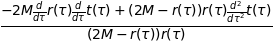

In [7]:
w(-1)

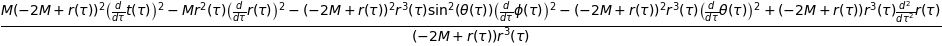

In [8]:
w(-2)

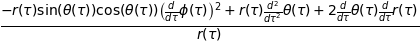

In [9]:
w(-3)

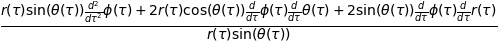

In [10]:
w(-4)

In [11]:
not any([(Rm.covariantD(i, j, k, l, m) + Rm.covariantD(i, j, m, k, l) + Rm.
covariantD(i, j, l, m, k)).simplify() \
for i, j, k, l, m in list(variations(range(1, 5), 5, True))])

True

#  <font color=purple>__Métrica de FLRW__: </font>

### En este caso se muestra la solución para la métrica:

### $ds^2 = g_{\mu \nu}dx^\mu dx^\nu = -dt^2 + a^2(t) \left(\dfrac{d \chi^2}{1- k \chi^2} + \chi^2 d \theta^2 + \chi^2 sin^2 \theta  d \phi^2 \right)$ 

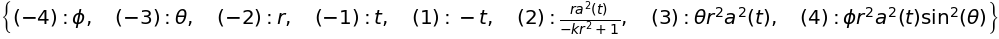

In [12]:
t, r, theta, phi, k, Lambda, GN = symbols('t, r, \\theta, \phi, k, \Lambda, G_N') #Define los símbolos

a = Function('a')

chi = Coordinates('\chi', [t, r, theta, phi])  #Crea el 4-Vector  
u = Coordinates('u', [1,0,0,0])   # 4-Velocidad para un observador en reposo

Metric = diag(-1, a(t)**2 / (1 - k*r**2), a(t)**2 * r ** 2, a(t)**2 * r ** 2 * sin(theta) ** 2) # Define la métrica

g = MetricTensor('g', u, Metric)  #Los índices corren de 1,2,3,4.
g = MetricTensor('g', chi, Metric)  #Los índices corren de 1,2,3,4.

#print g(-All, -All) #g^(\mu \nu)
chi.components 

In [13]:
#chi.partial_derivative_components
u.components

In [14]:
g(All, All)

⎡-1      0          0                0          ⎤
⎢                                               ⎥
⎢       2                                       ⎥
⎢      a (t)                                    ⎥
⎢0   ──────────     0                0          ⎥
⎢         2                                     ⎥
⎢    - k⋅r  + 1                                 ⎥
⎢                                               ⎥
⎢                 2  2                          ⎥
⎢0       0       r ⋅a (t)            0          ⎥
⎢                                               ⎥
⎢                           2  2       2        ⎥
⎣0       0          0      r ⋅a (t)⋅sin (\theta)⎦

In [15]:
Ga = Christoffel('Ga', g) # Símbolos de Christofell
Ga(-All, All, All)    # \Gamma^\mu_(\nu \sigma)
#Ga.components

⎡                                                                       ⎡     
⎢                                                                       ⎢     
⎢⎡0         0                0                        0              ⎤  ⎢     
⎢⎢                                                                   ⎥  ⎢     
⎢⎢         d                                                         ⎥  ⎢     
⎢⎢   -a(t)⋅──(a(t))                                                  ⎥  ⎢     
⎢⎢         dt                                                        ⎥  ⎢     
⎢⎢0  ───────────────         0                        0              ⎥  ⎢ ⎛   
⎢⎢          2                                                        ⎥  ⎢-⎝- k
⎢⎢       k⋅r  - 1                                                    ⎥  ⎢     
⎢⎢                                                                   ⎥  ⎢─────
⎢⎢                     2      d                                      ⎥  ⎢    ⎛
⎢⎢0         0         r ⋅a(t)⋅──(a(t))              

In [16]:
Ri = Ricci('Ri', g)   #Tensor de Ricci
Ri(All,All)

⎡     2                                                                       
⎢    d                                                                        
⎢-3⋅───(a(t))                                                                 
⎢     2                                                                       
⎢   dt                                                                        
⎢─────────────                     0                                          
⎢     a(t)                                                                    
⎢                                                                             
⎢                ⎛             2                     2⎞                       
⎢                ⎜            d            ⎛d       ⎞ ⎟                       
⎢               -⎜2⋅k + a(t)⋅───(a(t)) + 2⋅⎜──(a(t))⎟ ⎟                       
⎢                ⎜             2           ⎝dt      ⎠ ⎟                       
⎢                ⎝           dt                     

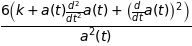

In [17]:
Ri.scalar()

In [18]:
G = Einstein('G', Ri)   #Tensor de Einstein
G(All,All)

⎡  ⎛              2⎞                                                          
⎢  ⎜    ⎛d       ⎞ ⎟                                                          
⎢3⋅⎜k + ⎜──(a(t))⎟ ⎟                                                          
⎢  ⎝    ⎝dt      ⎠ ⎠                                                          
⎢───────────────────                  0                                      0
⎢        2                                                                    
⎢       a (t)                                                                 
⎢                                                                             
⎢                                  2                   2                      
⎢                                 d          ⎛d       ⎞                       
⎢                     k + 2⋅a(t)⋅───(a(t)) + ⎜──(a(t))⎟                       
⎢                                  2         ⎝dt      ⎠                       
⎢                                dt                 

In [19]:
G_L = G(All,All) + Lambda*g(All,All)
G_L

⎡             ⎛              2⎞                                               
⎢             ⎜    ⎛d       ⎞ ⎟                                               
⎢           3⋅⎜k + ⎜──(a(t))⎟ ⎟                                               
⎢             ⎝    ⎝dt      ⎠ ⎠                                               
⎢-\Lambda + ───────────────────                          0                    
⎢                   2                                                         
⎢                  a (t)                                                      
⎢                                                                             
⎢                                                             2               
⎢                                                            d          ⎛d    
⎢                                                k + 2⋅a(t)⋅───(a(t)) + ⎜──(a(
⎢                                         2                   2         ⎝dt   
⎢                                \Lambda⋅a (t)      

# <font color=purple>__Tensor de energía momento__: </font>

## En este caso el $T_{\mu \nu}$ es para un fluido perfecto.

## $T_{\mu \nu} = (\rho + P) u_\mu u_\nu + P g_{\mu \nu}$

In [20]:
P = Function('P') #Define los símbolos
#print r
rho = Function('\\rho')

chi = Coordinates('\chi', [t, r, theta, phi])  #Crea el 4-Vector  

Te_m = diag(rho(a)*u(1)*u(1), P(rho)*g(2,2),P(rho)*g(3,3),P(rho)*g(4,4)) 

#print g(-All, -All) #g^(\mu \nu)
Te_m 

⎡\rho(a)        0               0                        0              ⎤
⎢                                                                       ⎥
⎢                  2                                                    ⎥
⎢         P(\rho)⋅a (t)                                                 ⎥
⎢   0     ─────────────         0                        0              ⎥
⎢                2                                                      ⎥
⎢           - k⋅r  + 1                                                  ⎥
⎢                                                                       ⎥
⎢                         2          2                                  ⎥
⎢   0           0        r ⋅P(\rho)⋅a (t)                0              ⎥
⎢                                                                       ⎥
⎢                                           2          2       2        ⎥
⎣   0           0               0          r ⋅P(\rho)⋅a (t)⋅sin (\theta)⎦